# Traffic Flow Modeling

## Theory - From the OPENEDX ASSIGNMENT
Consider the flow of traffic on a one-lane highway.  How can we describe the general behavior of this system?

We can define the speed of traffic, $V$, in kilometers per hour.  We can also define a traffic density, the number of cars per unit length of highway, $\rho$, in cars per kilometer.  Finally, we can define a traffic flux, or the flow rate of cars, $F$ in cars per hour.  

Now make a few assumptions about how traffic moves.  

If $\rho$ approaches 0, i.e. there are very few cars on the road, then cars will drive as fast as they can at some $V_{max}$.  

Conversely, if cars are bumper to bumper along the road, then $\rho$ approaches a $\rho_{max}$ and $V$ approaches $0$.

One possible equation to describe this behavior is

$$V = V_{max} \left(1 - \frac{\rho}{\rho_{max}} \right)$$

If we describe the traffic flux, $F$ as

$$F = V\rho$$

then

$$F = F(\rho) = V(\rho)\rho = V_{max} \rho \left(1 - \frac{\rho}{\rho_{max}} \right)$$

Unsteady traffic flow can be modelled as the non-linear convection of car density, so we apply the non-linear convection equation with $V$, the wave speed, equal to $\partial F/\partial \rho$:

$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0$$

where $F$ is defined as above. Replacing $F$ into the equation above yields: 

$$\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial \rho}\left(V_{max}\rho\left(1-\frac{\rho}{\rho_{max}}\right)\right)\frac{\partial \rho}{\partial x}=0$$

Which then simplifies to the full non-linear form:

$$\frac{\partial \rho}{\partial t} + \left(V_{max}\left(1-\frac{2\rho}{\rho_{max}}\right)\right)\frac{\partial \rho}{\partial x}=0$$

## Discretization
It is important to note that $\rho$ is a function of $x$ and $t$. Thus, we can use a forward-time/backward space discertization model to further analyze the traffic flow problem.

$$\rho = \rho(x,t) = \rho(x_{i}.t_{n})$$

From this, we can do a forward discretization in time. we start with the Taylor Expansion, and since the governing equation only goes to the first derivative, we can abstract away higher order derivative terms using O-notation.Recall, the Taylor Expansion is defined as:

$$\begin{align}
f(x)&=f(\gamma)+\sum\limits_{j=1}^{\infty} \frac{(x-\gamma)^{j}}{j!}\frac{\partial^{j}}{\partial x^{j}}f(\gamma)\\
&\implies \rho(x_{i},t_{n+1})=\rho(x_{i},t_{n})+ \left.\frac{\Delta t^{1}}{1!}\frac{\partial^{1} \rho}{\partial t^{1}}\right|_{x_{i},t_{n}}+O(\Delta t^{2})\\
&\implies \frac{\rho(x_{i},t_{n+1}) - \rho(x_{i},t_{n})}{\Delta t}=\left.\frac{\partial\rho}{\partial t}\right|_{x_{i},t_{n}} + O(\Delta t^{2})
\end{align}$$

Similarly, for the space discretization:

$$\begin{align}
\rho(x_{i},t_{n})=\rho(x_{i-1},t_{n})+ \left.\frac{\Delta x^{1}}{1!}\frac{\partial^{1} \rho}{\partial x^{1}}\right|_{x_{i-1},t_{n}} &+ O(\Delta x^{2})\\
\implies \frac{\rho(x_{i-1},t_{n}) - \rho(x_{i},t_{n})}{-\Delta x}=\left.\frac{\partial\rho}{\partial x}\right|_{x_{i-1},t_{n}} &+ O(\Delta x^{2})
\end{align}$$

Note that the $\Delta t$ is negative. This is due to the fact we would be subtracting the previous space step from the current one. Neglecting the higher order terms, we come to our final discretization model:

$$\begin{align}
\frac{\rho(x_{i},t_{n+1}) - \rho(x_{i},t_{n})}{\Delta t}&=\left.\frac{\partial\rho}{\partial t}\right|_{x_{i},t_{n}}\\
\frac{\rho(x_{i},t_{n}) - \rho(x_{i-1},t_{n})}{\Delta x}&=\left.\frac{\partial\rho}{\partial x}\right|_{x_{i},t_{n}}
\end{align}$$

plugging this into our original equation, and allowing for some initial conditions, we get our final equation to be: 

$$
\frac{\rho(x_{i},t_{n+1}) - \rho(x_{i},t_{n})}{\Delta t}+\left[V_{max}\left(1-\frac{2\rho(x_{i},t_{n})}{\rho_{max}}\right)\right]\frac{\rho(x_{i},t_{n}) - \rho(x_{i-1},t_{n})}{\Delta x}=0
$$

This can further be simplified into: 

$$
\rho(x_{i},t_{n+1}) = \rho(x_{i},t_{n})-\Delta t\left[V_{max}\left(1-\frac{2\rho(x_{i},t_{n})}{\rho_{max}}\right)\right]\frac{\rho(x_{i},t_{n}) - \rho(x_{i-1},t_{n})}{\Delta x}
$$

Thus, we now have the next step in time as a function of changes in space for the current timestep. We can use this model as the basis for our code.

## Code

Minimum Velocity at t = 0 minutes:  17.7777777778 m/s
Average Velocity at t = 3 minutes:  20.6361661961 m/s
Minimum Velocity at t = 6 minutes:  18.7847168709 m/s


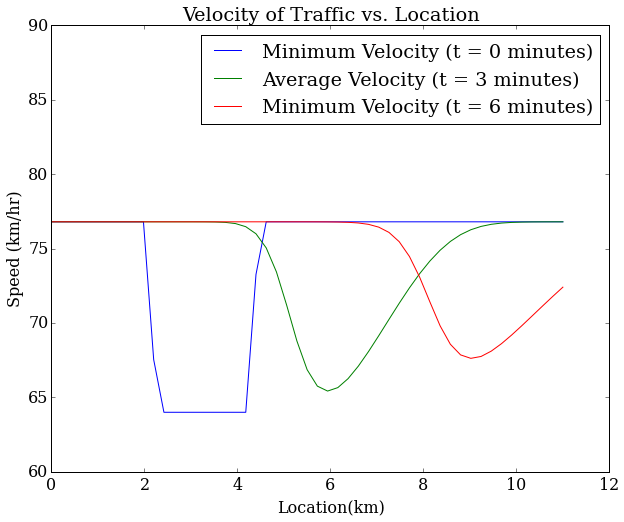

In [41]:
## Part A: modular version
##Import all necessary libraries and setup configurations
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

#Defining Modular function
def traffic_flow(nt,init,lab):
    ##Creating variable constants as defined by the problem
    vmax = 80. #km/hr
    L = 11. #km
    rhomax = 250. #cars/hr
    nx = 51 #number of intervals in your space vector
    dx = x[1]-x[0] #dx
    dt = 0.001 #hours
    scale = 5/18 #conversion factor from km/hr to m/s
    v = numpy.zeros(nx)
    vn = numpy.zeros(nx)
    rho = numpy.ones(nx)*init
    rho[10:20] = 50
    rho[0] = init

    for i in range(nt):
        rn = rho.copy()
        for j in range(1,nx):
            rho[j] = rn[j] - dt/dx*((vmax*rn[j]*(1-(rn[j]/rhomax))) - (vmax*rn[j-1]*(1-(rn[j-1]/rhomax))))
            rho[0]=init
        for j in range(nx):
            v[j]=vmax*rho[j]*(1-(rho[j]/rhomax))/rho[j]
        for j in range(nx):
            vn[j]=vmax*rn[j]*(1-(rn[j]/rhomax))/rn[j]
    #Visualization code, assumes a figure has been created already   
    pyplot.plot(x,v,label=lab)
    pyplot.title('Velocity of Traffic vs. Location')
    pyplot.xlabel('Location(km)')
    pyplot.ylabel('Speed (km/hr)')
    pyplot.ylim(60,90)
    pyplot.legend(loc='upper right')
    #plt.show()
    
    return rho,(v*scale),rn,(vn*scale)

#Creating figure for visualization
pyplot.figure(figsize=(10,8))

# Part A - solutions
r,v,rn,vn=traffic_flow(1,10,'Minimum Velocity (t = 0 minutes)')
print("Minimum Velocity at t = 0 minutes: ",min(vn),"m/s")

r,v,rn,vn=traffic_flow(50,10,'Average Velocity (t = 3 minutes)')
print("Average Velocity at t = 3 minutes: ",(sum(v)/51),"m/s")

r,v,rn,vn=traffic_flow(100,10,'Minimum Velocity (t = 6 minutes)')
print("Minimum Velocity at t = 6 minutes: ",min(v),"m/s")

Minimum Velocity at t = 0 minutes:  30.2222222222 m/s
Average Velocity at t = 3 minutes:  33.872218191 m/s
Minimum Velocity at t = 3 minutes:  30.9864026806 m/s


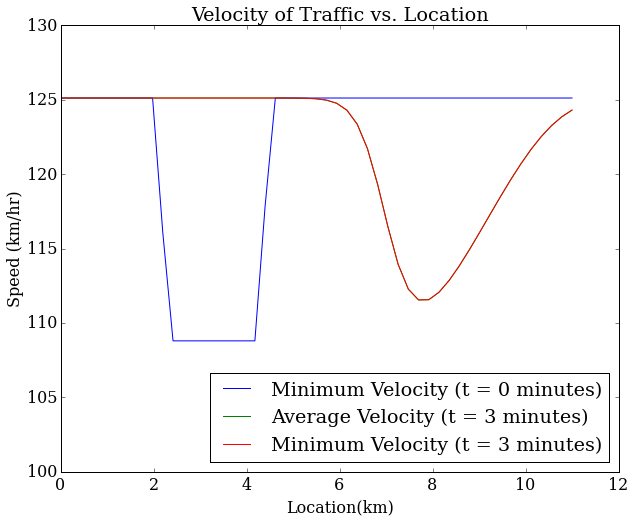

In [42]:
## Part B: modular version
##Import all necessary libraries and setup configurations
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

#Defining Modular function
def traffic_flow(nt,init,lab):
    ##Creating variable constants as defined by the problem
    vmax = 136. #km/hr
    L = 11. #km
    rhomax = 250. #cars/hr
    nx = 51 #number of intervals in your space vector
    dx = x[1]-x[0] #dx
    dt = 0.001 #hours
    scale = 5/18 #conversion factor from km/hr to m/s
    v = numpy.zeros(nx)
    vn = numpy.zeros(nx)
    rho = numpy.ones(nx)*init
    rho[10:20] = 50
    rho[0] = init

    for i in range(nt):
        rn = rho.copy()
        for j in range(1,nx):
            rho[j] = rn[j] - dt/dx*((vmax*rn[j]*(1-(rn[j]/rhomax))) - (vmax*rn[j-1]*(1-(rn[j-1]/rhomax))))
            rho[0]=init
        for j in range(nx):
            v[j]=vmax*rho[j]*(1-(rho[j]/rhomax))/rho[j]
        for j in range(nx):
            vn[j]=vmax*rn[j]*(1-(rn[j]/rhomax))/rn[j]
    #Visualization code, assumes a figure has been created already   
    pyplot.plot(x,v,label=lab)
    pyplot.title('Velocity of Traffic vs. Location')
    pyplot.xlabel('Location(km)')
    pyplot.ylabel('Speed (km/hr)')
    pyplot.ylim(100,130)
    pyplot.legend(loc='lower right')
    #plt.show()
    
    return rho,(v*scale),rn,(vn*scale)

#Creating figure for visualization
pyplot.figure(figsize=(10,8))

# Part B - solutions
r,v,rn,vn=traffic_flow(1,20,'Minimum Velocity (t = 0 minutes)')
print("Minimum Velocity at t = 0 minutes: ",min(vn),"m/s")

r,v,rn,vn=traffic_flow(50,20,'Average Velocity (t = 3 minutes)')
print("Average Velocity at t = 3 minutes: ",(sum(v)/51),"m/s")

r,v,rn,vn=traffic_flow(50,20,'Minimum Velocity (t = 3 minutes)')
print("Minimum Velocity at t = 3 minutes: ",min(v),"m/s")

In [43]:
## Depreciated code, not modular

'''##Import all necessary libraries and setup configurations
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

##Creating variable constants as defined by the problem
vmax = 80 #km/hr
L = 11 #km
rhomax = 250 #cars/hr
nx = 51 # umber of intervals in your space vector
dx = L/(nx-1)
dt = .001 #hours
tmax = .1 #maximum time (6 minutes) in an hour

#Part 1
x = numpy.linspace(0,L,nx) #space vector
rho0 = numpy.ones(nx)*10 #set all of rho0 to 10
rho0[10:20] = 50 #add a spike to rho0 from 10 to 20, essentially creating an initial box distribution
rho = numpy.ndarray(shape=(tmax/dt,nx),dtype=float) #create solutions array
rho[0,0:]=rho0 #set initial solution to initial condition
rho[:,0]=10 #set boundary condition

for t in numpy.linspace(dt,tmax-dt)*(dt**(-1)): #set row index (need them to be integers)
    for i in range(1,nx-1): #set column index
        rho[t,i+1]=rho[t-1,i]-(dt/dx)*(vmax*(1-(rho[t-1,i]/rhomax)))*(rho[t-1,i]-rho[t-1,i-1])

v=vmax*(1-(rho/rhomax)) #need to convert the density into a velocity using model

#print out results
print("Minimum Velocity at t=0 is: ",min(v[0,:]))
print("Average Velocity at t=3 minutes is: ",numpy.mean(v[(len(v)/2+1),:]))
print("Minimum Velocity at t=6 minutes is: ",min(v[-1,:]))

#Visualize
pyplot.figure(figsize=(10,8))
pyplot.title('Traffic Speed as a Function of Location')
pyplot.plot(x,v[0,:],label='t=0')
pyplot.plot(x,v[(len(v[0,:])/2),:],label='t=3')
pyplot.plot(x,v[-1,:],label='t=6')
pyplot.xlabel('Length (km)')
pyplot.legend()''';